In [125]:
import pandas as pd

In [126]:
import numpy as np

In [143]:
df=pd.read_excel('timeseries.xls')

In [144]:
df.head()

,Day,funds rec,fund remittances,Balance
0,2018-06-01,0,0.0,162348.74
1,2018-06-02,0,0.0,162331.04
2,2018-06-03,0,0.0,162331.04
3,2018-06-04,0,0.0,96452.04
4,2018-06-05,0,0.0,396452.04


In [145]:
df=df.fillna(0)

In [146]:
df.head()

,Day,funds rec,fund remittances,Balance
0,2018-06-01,0,0.0,162348.74
1,2018-06-02,0,0.0,162331.04
2,2018-06-03,0,0.0,162331.04
3,2018-06-04,0,0.0,96452.04
4,2018-06-05,0,0.0,396452.04


In [147]:
df.index=pd.to_datetime(df.Day)

In [148]:
df=df.drop(columns='Day')

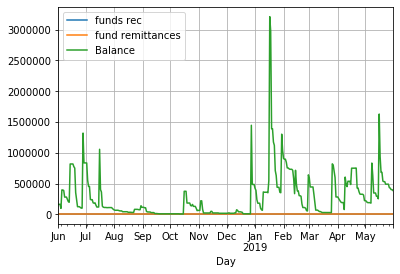

In [149]:
df.plot(grid=True)

In [150]:
df2=df.resample(rule='W',how='last')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  """Entry point for launching an IPython kernel.


In [151]:
df2

,funds rec,fund remittances,Balance
Day,,,
2018-06-03,0,0.0,162331.04
2018-06-10,0,0.0,279943.04
2018-06-17,0,0.0,817867.04
2018-06-24,0,0.0,123794.04
2018-07-01,0,0.0,835731.08
2018-07-08,0,0.0,237714.48
2018-07-15,0,0.0,118417.78
2018-07-22,0,0.0,111171.38
2018-07-29,0,0.0,109700.58


In [152]:
df=df.drop(columns=['funds rec','fund remittances'])

In [153]:
import statsmodels

In [154]:
from statsmodels.graphics.tsaplots import plot_acf

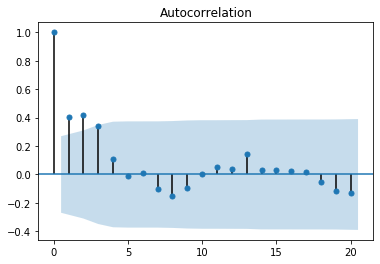

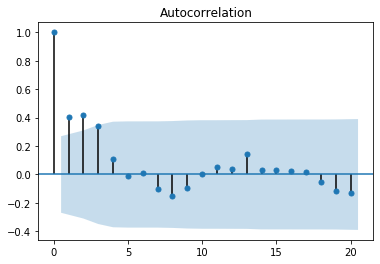

In [155]:
plot_acf(x=df2['Balance'],lags=20,alpha=0.05)

In [139]:
import matplotlib.pyplot as plt

# We have the highest correlation when the lag is 2

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\

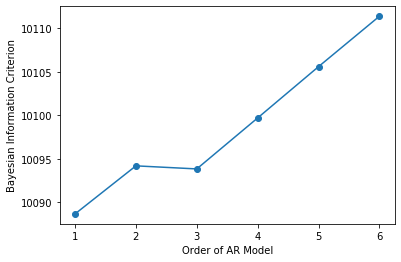

In [156]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(df, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


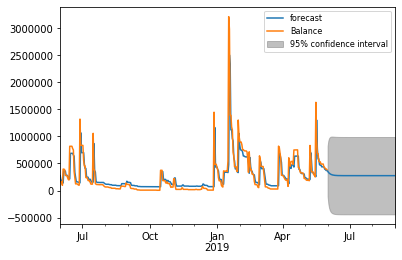

In [157]:
 #Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(df, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0,end='2019-09-01')
plt.legend(fontsize=8)
plt.show()